# Solution to Ash Fallout Exercise

### Naylor, 2018

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import time
#import pylab as plt
from IPython import display

Text(0.5,1,'Initial Positions')

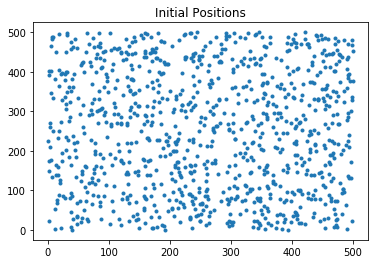

In [2]:
## Initialise the model

L = 500.       # Width of system
N_0 = 1000    # Initial number of particles

## Create a N*2 matrix of random position pairs
## Column 0 is x and column 1 is y
X  = np.random.random((N_0,2)) * L

plt.plot(X[:,0], X[:,1], ".")
plt.title("Initial Positions")


Define a function to find the nearest neighbour distances and indices

In [3]:
## Create a nearest neighbour algorithm (See Session 3)

def nearestNeighbour(X):
    N = len(X)
    diff = X.reshape(N,1,2)-X
    D = (diff ** 2).sum(2)
    
    i = np.arange(N)
    D[i,i] = np.inf
    i = np.argmin(D, 1)
    d = np.sqrt( np.min(D, 1) )
    return i, d

KeyboardInterrupt: 

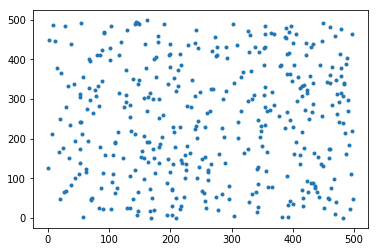

In [5]:
numberOfTimesteps = 3000

plotAnimation = True

threshold = 1.      # The distance threshold

# Create an empty array to store the number of particles in
N_t = [N_0]

N_t_while = np.array([N_0])

#for i in range(numberOfTimesteps):
while( len(X) > 0.01*N_0 ):
    tmpN = len(X)
    
    # create a matrix of random numbers drawn from a 
    # normal distribution. Reshape this to the same shape
    # as the positions array
    Updates = np.random.randn(2*tmpN)
    Updates = Updates.reshape( (tmpN,2) )
    
    # Update the position of the particles
    X += Updates
    
    # Apply periodic Boundary Conditions
    X[X>L] -= L
    X[X<0] += L
    
    # Find nearest neighbours and the distances
    nn, d = nearestNeighbour(X)
    
    # Find all particles closer than the threshold
    particlesToKeep = (d>threshold)
    
    # We can just apply the boolean mask of particles to keep
    X = X[particlesToKeep]
                
    # Record how many particles remain    
    N_t_while = np.append(N_t_while,len(X))
    N_t.append(len(X))
    
    if(plotAnimation):
        plt.plot(X[:,0], X[:,1], ".", hold=False)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(0.01) # necessary to get the plot up.



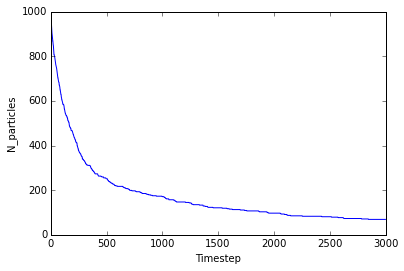

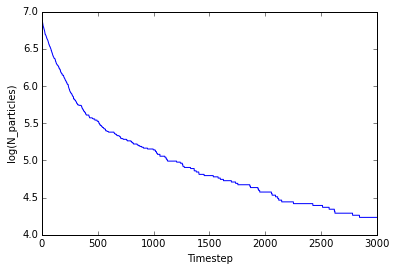

In [34]:
plt.figure(1)
plt.plot(N_t)
plt.xlabel("Timestep")
plt.ylabel("N_particles")

plt.figure(2)
plt.plot(np.log(N_t))
plt.xlabel("Timestep")
plt.ylabel("log(N_particles)")